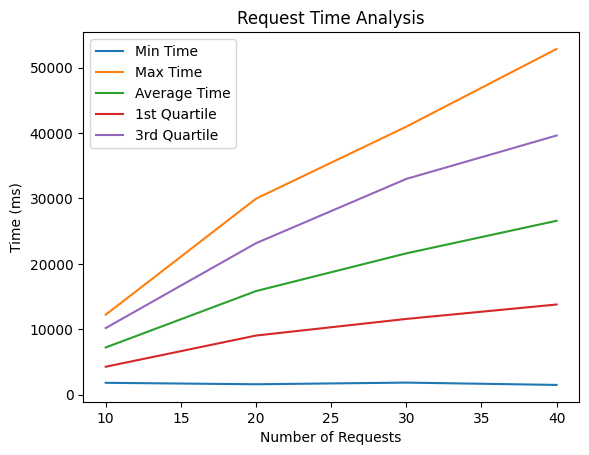

In [3]:
import asyncio
import aiohttp
import time
import matplotlib.pyplot as plt
import numpy as np

server_url = 'http://192.168.0.100:8080/generate-key'

async def test_request_times(num_requests):
    async with aiohttp.ClientSession() as session:
        async def measure_request_time():
            start_time = time.perf_counter()
            await session.get(server_url)
            end_time = time.perf_counter()
            return (end_time - start_time) * 1000  # Convert to milliseconds

        tasks = [measure_request_time() for _ in range(num_requests)]
        durations = await asyncio.gather(*tasks)

    return durations  # Return list of durations for each request

async def main():
    request_counts = [10, 20, 30, 40]  # Number of requests
    
    x = request_counts
    y_min, y_max, y_avg, y_q1, y_q3 = [], [], [], [], []

    for count in request_counts:
        durations = await test_request_times(count)
        y_min.append(min(durations))
        y_max.append(max(durations))
        y_avg.append(sum(durations) / len(durations))
        y_q1.append(np.percentile(durations, 25))
        y_q3.append(np.percentile(durations, 75))

    plt.plot(x, y_min, label='Min Time')
    plt.plot(x, y_max, label='Max Time')
    plt.plot(x, y_avg, label='Average Time')
    plt.plot(x, y_q1, label='1st Quartile')
    plt.plot(x, y_q3, label='3rd Quartile')

    plt.xlabel('Number of Requests')
    plt.ylabel('Time (ms)')
    plt.title('Request Time Analysis')
    plt.legend()
    plt.show()

await main()